In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = pd.read_excel("data.xls")
df = pd.DataFrame(a)

for x in df.index:

    if df.loc[x, "parallax"] == 0:
    
        df.loc[x, "parallax"] = np.nan
        
#print(df)

In [3]:
df = df.dropna()
print(df.to_string())

         name        ra      dec  vmag  parallax
13    HR 1271   55.6338 -85.2622  6.41     0.008
33    HR 8280  327.7263 -82.7192  5.29     0.011
45    HR 4304  164.8038 -81.5561  6.71     0.010
60    HR 4231  161.3154 -80.4697  5.47     0.003
61    HR 2022   84.2908 -80.4692  5.65     0.044
81     HR 776   37.9188 -79.1094  5.28     0.001
82    HR 2919  111.4083 -79.0942  5.53    -0.002
84    HR 5470  221.9650 -79.0447  3.83     0.029
87    HR 6102  248.3625 -78.8972  3.89     0.056
92    HR 6020  245.0867 -78.6958  4.68     0.020
93    HR 6021  245.1117 -78.6672  5.27     0.020
94    HR 4174  158.8671 -78.6078  4.11     0.009
103   HR 4583  179.9054 -78.2219  4.91     0.012
111   HR 5082  203.3117 -77.5683  6.48     0.034
112   HR 6163  250.7692 -77.5175  4.24     0.034
114   HR 3340  125.1604 -77.4844  4.35     0.036
116   HR 8254  325.3687 -77.3900  3.76     0.053
119     HR 98    6.4379 -77.2542  2.80     0.153
121   HR 9084    0.3988 -77.0658  4.78     0.017
123   HR 8021  316.1

In [4]:
#Datos 

#1[UA] = 1.496x10^11[m] = 1.496x10^8[Km] = 1.49x10^13[cm] = 4.848x10^-6[pc] = 1.581x10^-5[al]
#1[pc] = 3.086x10^16[m] = 3.086x10^13[Km] = 3.086x10^18[cm] = 206 265[UA] = 3.26[al] 
#1[al] = 9.46x10^15[m] = 9.46x10^12[km] = 9.46x10^17[cm] = 63241[UA] = 0.3066[pc]

#L_sol = 3.84x10^26[W] = 3.84x10^33[erg s^-1] 
#R_sol = 6.96x10^8[m] = 6.96x10^10[cm]  
#Phi_sol = 6.31x10^7[W m^-2] = 6.31x10^10[erg cm^-2 s^-1]
#M_sol = +4.74
#m_sol = -26.83

#Cte. de Stefan-Boltzmann = 5.67x10^-8[W m^-2 K^-4] = 5.67x10^-5[erg cm^-2 s^-1 K^-4]

#f_sol_10pc = 1.3e34

f_sol= 6.31e7 ##W m^-2
l_sol= 3.84e26 ##W
r_sol= 6.96e8 ##meter
t_sol= 5775. ##Kelvin
d_sol= 4.848e-6 #pc
d_sol_m = 1.496e11 #metro
M_sol= 4.74 ##Adimensionales
m_sol= -26.83 ##Adimensionales
sigma = 5.67e-8 #Cte. Steffan-Boltzmann [W m^-2 K^-4]

In [5]:
b = df.to_numpy() # 0 -> name, 1-> ra(en grados), 2-> dec(en grados), 3-> vmag, 4-> parallax

#Vector de datos
name = np.transpose(b[:,[0]]) 
ra = np.transpose(b[:,[1]]) 
dec = np.transpose(b[:,[2]])
vmag = np.transpose(b[:,[3]])
prlx = np.transpose(b[:,[4]])

#Datos ordenados
name = name[0]
ra = ra[0]
dec = dec[0]
vmag = vmag[0]
prlx = prlx[0]

d = np.abs(prlx**-1) #Parsec

#Para ver todo el array
#import sys
#import numpy
#numpy.set_printoptions(threshold=sys.maxsize)

print("Vmag(m):",vmag)
print("Distancia[pc]:",d)
print("RA[deg]:",ra)
print("DEC[deg]:",dec)

Vmag(m): [6.41 5.29 6.71 ... 5.07 6.25 2.02]
Distancia[pc]: [125.0 90.90909090909092 100.0 ... 333.3333333333333 90.90909090909092
 142.85714285714286]
RA[deg]: [55.6338 327.7263 164.8038 ... 115.1271 19.0562 37.9529]
DEC[deg]: [-85.2622 -82.7192 -81.5561 ... 87.02 87.1453 89.2642]


In [ ]:
print("Datos de Rigel:",b[1264],d[1264]) 
print("Datos de Polaris:",b[3263],d[3263])

### Resumen
Para la obtención de los parámetros utilizados, considerar los siguientes pasos:
1. Despejar Magnitud abs. de: $m - M =5(Log(d - 1))$, donde m y d son conocidas
2. Despejar Luminsoidad de: $M = M_s - 2.5Log(\frac{L}{L_s})$, $M, M_s y L_s$ son conocidos
3. Calculo del Flujo Total: $M=M_s - 2.5Log(\frac{\Phi d^2}{\Phi_sd_s^2})$
4. Calculo de Radios de estrellas: $\Phi = \frac{L}{4\pi R^2}$, $\Phi y L$ son conocidos
5. Cálculo de Temperaturas efectivas: $L = 4\pi R^2 \sigma T_{eff}^4$, $L y R$ son conocidos

In [6]:
def Mag(m,dist): #Funciona bien
    return -(5*(np.log10(dist)-1)-m)
M = Mag(vmag.astype(float),d.astype(float))
print("M:",M)

def Lum(MagnitudAbs,Msolcito): #Esto lo deja en función de Lumunosidades Solares
    return 10**((MagnitudAbs-Msolcito)/-2.5)

L_en_soles = Lum(M,M_sol)
L = Lum(M,M_sol)* l_sol #W 
print("L[L_s]:",L_en_soles)
print("L:",L)

def Flux(MagnitudAbs,dist):
    return ((d_sol**2)*f_sol*(10**((MagnitudAbs-M_sol)/-2.5)))/(dist**2)  #Ant.
    #return (10**(-2*(MagnitudAbs-m_sol)/5)*f_sol*(d_sol**2)/(dist**2)) #Prueba Paulette
F = Flux(M,d)
print("F:",F)

def Radio(Luminosidad,Flujo):
    return np.sqrt(Luminosidad.astype(float)/(4*np.pi*Flujo.astype(float)))
R = Radio(L,F).astype(float)
print("R:",R)

def Teff(Luminosidad,Rad):
    return (Luminosidad/(4*np.pi*(Rad**2)*sigma))**(1/4)
T = Teff(L,R)
print("T:",T)

print("\n", "Datos de Rigel:",M[1264],L_en_soles[1264],L[1264],F[1264])
print("Datos de Polaris:",M[3263],L_en_soles[3263],L[1264],F[1264])
print("Flujos",np.max(F),"\n Radios",np.max(R),"\n Teff",np.max(T))

M: [ 0.92544993  0.49696343  1.71       ... -2.54439373  1.45696343
 -3.7545098 ]
L[L_s]: [  33.55985116   49.7983129    16.29296033 ...  819.89358903   20.56906875
 2499.21673319]
L: [1.28869828e+28 1.91225522e+28 6.25649677e+27 ... 3.14839138e+29
 7.89852240e+27 9.59699226e+29]
F: [3.1853310977959165e-06 8.936235009770329e-06 2.416320739831077e-06 ...
 1.0943458153404197e-05 3.69108954798266e-06 0.0001816161987348044]
R: [1.79429316e+16 1.30494048e+16 1.43543453e+16 ... 4.78478177e+16
 1.30494048e+16 2.05062076e+16]
T: [2.73774428 3.54317727 2.55501163 ... 3.7272874  2.84048749 7.52303151]

 Datos de Rigel: -4.310283238465816 4169.781473178384 1.6011960857004993e+30 0.001045092140193685
Datos de Polaris: -3.7545097999287154 2499.2167331939763 1.6011960857004993e+30 0.001045092140193685
Flujos 0.004478726903589972 
 Radios 1.4354345307549125e+17 
 Teff 16.76458783877372


In [7]:
print("Solecito")

M_ss = Mag(m_sol,d_sol)
print("M:",M_ss)
L_en_solcitos = Lum(M_ss,M_sol)
L_ss = L_en_solcitos * l_sol
print("L_ensolecitos_del solecito:",L_en_solcitos)
print("Lumunosidad Solar:",L_ss)
F_ss = Flux(M_ss,d_sol)
print("Flujo Solar:",F_ss)
R_ss = Radio(L_ss,F_ss)
print("Radio Solar:",R_ss)
T_ss = Teff(L_ss,R_ss)
print("T Solar:",T_ss)

Solecito
M: 4.742186944208854
L_ensolecitos_del solecito: 0.9979877771864821
Lumunosidad Solar: 3.832273064396091e+26
Flujo Solar: 62973028.74046702
Radio Solar: 695898660.5099815
T Solar: 5772.884661557634


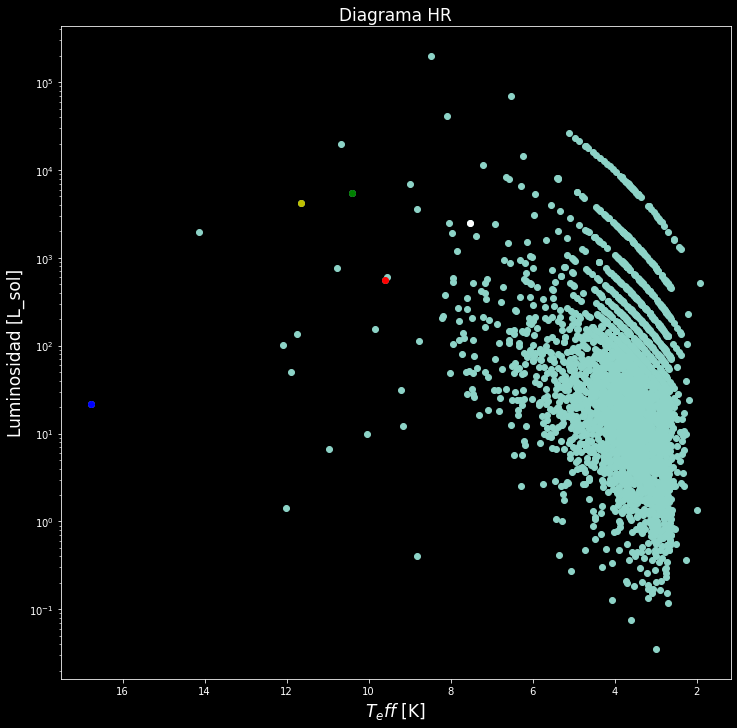

In [9]:
#Porque el flujo me da tan bajo???

fig1 = plt.figure(figsize=(12,12))
plt.style.use('dark_background')
plt.title("Diagrama HR",fontsize=17)
plt.xlabel('$T_eff$ [K]',fontsize=17)
plt.ylabel('Luminosidad [L_sol]',fontsize=17)

plt.yscale('log')
#plt.xscale('log')

plt.scatter(T,L_en_soles)

plt.scatter(T[851],L_en_soles[851],c="r") #Antares
plt.scatter(T[3263],L_en_soles[3263],c="w") #Polaris
plt.scatter(T[1264],L_en_soles[1264],c="y") #Rigel
plt.scatter(T[1079],L_en_soles[1079],c="b") #Sirio
plt.scatter(T[196],L_en_soles[196],c="g") #Hadar
#plt.scatter(T_ss,L_en_solcitos,c="orange") #Solecito
plt.gca().invert_xaxis()

#t1= 3600 #Antares #Roja
#t2= 7000 #Polaris #Blanca
#t3= 11000 #Rigel  #Amarillo 
#t4= 9940  #Sirio  #Azul 
#t5= 25000 # Hadar (beta cen) #Verde

In [10]:
#Encontrar el indice de alguna estrella
print(name)

for i in range(len(name)):
    if name[i] == "HR 5267":
        print(i)
#print(name[1264])

['HR 1271' 'HR 8280' 'HR 4304' ... 'HR 2609' 'HR 306' 'HR 424']
196


In [12]:
print("Antares")
g = Mag(vmag[851],d[851]) #Magnitud absoluta
print("M:",g)
print("m:",vmag[851])
print("distancia:",d[851])
print("L_[L_s]:",Lum(M[851],M_sol))
print("L:",L[851])
print("F:",Flux(g,d[851])) ##
print("T:",T[851])
print("R:",R[851])
print("")
print("Polaris")
g2 = Mag(vmag[3263],d[3263]) #Magnitud absoluta
print("M:",g2)
print("m:",vmag[3263])
print("distancia:",d[3263])
print("L_[L_s]:",Lum(M[3263],M_sol))
print("L:",L[3263])
print("F:",Flux(g2,d[3263])) ##
print("T:",T[3263])
print("R:",R[3263])
print("")
print("Rigel")
g3 = Mag(vmag[1264],d[1264]) #Magnitud absoluta
print("M:",g3)
print("m:",vmag[1264])
print("distancia:",d[1264])
print("L_[L_s]:",Lum(M[1264],M_sol))
print("L:",L[1264])
print("F:",Flux(g3,d[1264])) ##
print("T:",T[1264])
print("R:",R[1264])
print("")
print("Sirio")
g4 = Mag(vmag[1079],d[1079]) #Magnitud absoluta
print("M:",g4)
print("m:",vmag[1079])
print("distancia:",d[1079])
print("L_[L_s]:",Lum(M[1079],M_sol))
print("L:",L[1079])
print("F:",Flux(g4,d[1079])) ##
print("T:",T[1079])
print("R:",R[1079])
print("")
print("Hadar")
g5 = Mag(vmag[196],d[196]) #Magnitud absoluta
print("M:",g5)
print("m:",vmag[196])
print("distancia:",d[196])
print("L_[L_s]:",Lum(M[196],M_sol))
print("L:",L[196])
print("F:",Flux(g5,d[196])) ##
print("T:",T[196])
print("R:",R[196])


Antares
M: -2.138943791441969
m: 0.96
distancia: 41.666666666666664
L_[L_s]: 564.3876690719344
L: 2.167248649236228e+29
F: 0.00048211937130626664
T: 9.602689375162887
R: 5980977211478801.0

Polaris
M: -3.7545097999287154
m: 2.02
distancia: 142.85714285714286
L_[L_s]: 2499.2167331939763
L: 9.596992255464869e+29
F: 0.0001816161987348044
T: 7.523031506778759
R: 2.050620758221303e+16

Rigel
M: -4.310283238465816
m: 0.12
distancia: 76.92307692307692
L_[L_s]: 4169.781473178384
L: 1.6011960857004993e+30
F: 0.001045092140193685
T: 11.651796222301147
R: 1.1041804082730094e+16

Sirio
M: 1.4101563386385942
m: -1.46
distancia: 2.6666666666666665
L_[L_s]: 21.47521223396989
L: 8.246481497844438e+27
F: 0.004478726903589972
T: 16.76458783877372
R: 382782541534643.25

Hadar
M: -4.618787452803375
m: 0.61
distancia: 111.11111111111111
L_[L_s]: 5540.066542384352
L: 2.1273855522755912e+30
F: 0.0006655099938114069
T: 10.40861346072451
R: 1.594927256394347e+16


## BB

<ipython-input-13-fc10e4fafc6c>:10: RuntimeWarning: overflow encountered in exp
  return (a0/(lam)**5)*(np.exp(b0)-1)**-1


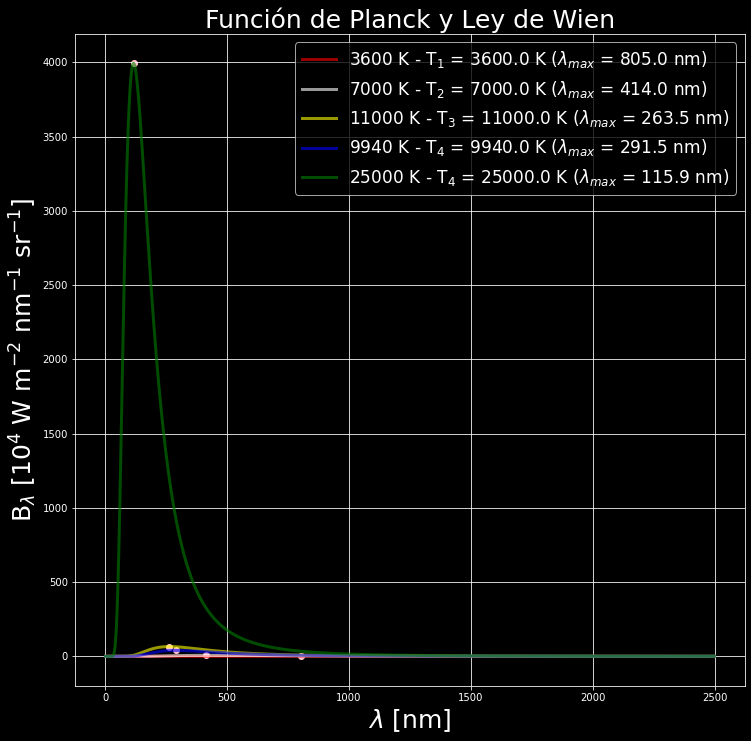

In [13]:
#Constantes físicas
h = 6.626e-34
c = 2.997e+8
k = 1.380e-23

#Función de Planck
def Blam(lam,t0):
    a0 = 2.0*h*c**2
    b0 = h*c/(lam*k*t0)
    return (a0/(lam)**5)*(np.exp(b0)-1)**-1
lam = np.arange(1e-9,2.5e-6,1e-9)

#Ley de Wien
wien = 2.898e-3
    
#FIGURE1
fig1 = plt.figure(figsize=(12,12))

#Temperatures of Blackbodies
t1= 3600 #Antares #Roja
t2= 7000 #Polaris #Blanca
t3= 11000 #Rigel  #Amarillo 
t4= 9940  #Sirio  #Azul 
t5= 25000 # Hadar (beta cen) #Verde

y1 = Blam(lam,t1)
y2 = Blam(lam,t2)
y3 = Blam(lam,t3)
y4 = Blam(lam,t4)
y5 = Blam(lam,t5)

w1 = wien/t1
w2 = wien/t2
w3 = wien/t3
w4 = wien/t4
w5 = wien/t5

z1 = Blam(w1,t1)
z2 = Blam(w2,t2)
z3 = Blam(w3,t3)
z4 = Blam(w4,t4)
z5 = Blam(w5,t5)

w = np.array([w1,w2,w3,w4,w5])
z = np.array([z1,z2,z3,z4,z5])

#Aquí todo está en metros, se necesita multiplicar por potencias de 10 para pasarlas a nm
#El lambda está en 1e-9[m], para pasar a nm, multiplicar por 1e9
#El eje y tiene un factor 10e4 y está en 1e-9[m], para pasar nm, multiplicar por el factor con exp(-) y por 1e9 
plt.plot(lam*1e9,y1*1e-9*1e-4, color = "red", alpha=0.6, linewidth = 3, label = "3600 K - T$_{1}$ = %.1f K ($\lambda_{max}$ = %.1f nm)" %(t1,w1*1e9))
plt.plot(lam*1e9,y2*1e-9*1e-4, color = "white", alpha=0.6, linewidth = 3, label = "7000 K - T$_{2}$ = %.1f K ($\lambda_{max}$ = %.1f nm)" %(t2,w2*1e9))
plt.plot(lam*1e9,y3*1e-9*1e-4, color = "yellow", alpha=0.6, linewidth = 3, label = "11000 K - T$_{3}$ = %.1f K ($\lambda_{max}$ = %.1f nm)" %(t3,w3*1e9))
plt.plot(lam*1e9,y4*1e-9*1e-4, color = "blue", alpha=0.6, linewidth = 3, label = "9940 K - T$_{4}$ = %.1f K ($\lambda_{max}$ = %.1f nm)" %(t4,w4*1e9))
plt.plot(lam*1e9,y5*1e-9*1e-4, color = "green", alpha=0.6, linewidth = 3, label = "25000 K - T$_{4}$ = %.1f K ($\lambda_{max}$ = %.1f nm)" %(t5,w5*1e9))
plt.scatter(w*1e9,z*1e-9*1e-4, color = "pink")

plt.title("Función de Planck y Ley de Wien",fontsize=25)
plt.xlabel('$\lambda$ [nm]',fontsize=25)
plt.ylabel('B$_{\lambda}$ [10$^{4}$ W m$^{-2}$ nm$^{-1}$ sr$^{-1}$]',fontsize=25)
#plt.xlim(0,1650)
#plt.ylim(0,10)

plt.legend(fontsize=17)
plt.grid()
plt.show()

Text(0, 0.5, 'DEC[edg]')

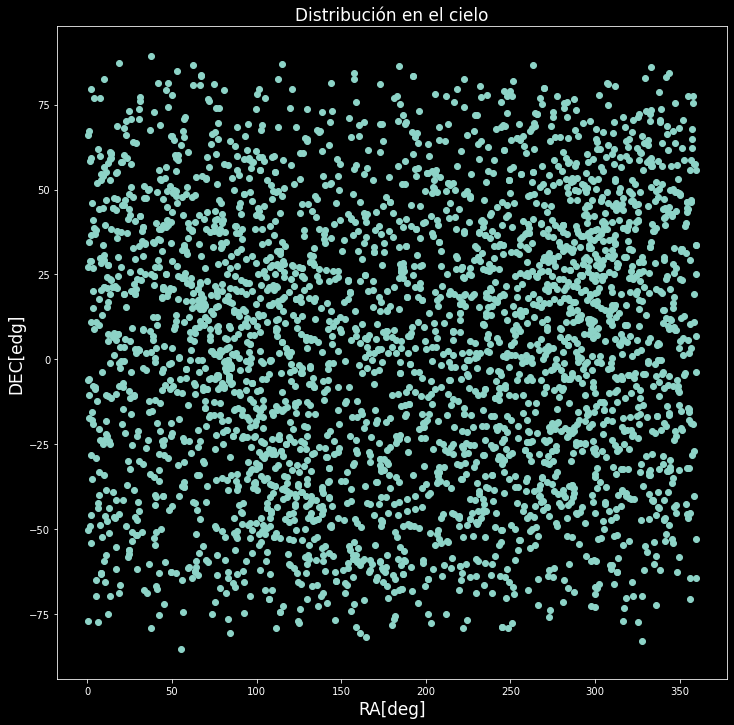

In [15]:
fig1 = plt.figure(figsize=(12,12))
plt.scatter(ra,dec)
plt.title("Distribución en el cielo",fontsize=17)
plt.xlabel("RA[deg]",fontsize=17)
plt.ylabel("DEC[edg]",fontsize=17)